In [79]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody
from astropy import units as u
from scipy.integrate import quad
from astropy import constants as const

In [2]:
# Generates a zodiacal background
# See Sec. 2.2.3 in Dannert+ 2022

In [89]:
# set some parameters

tau_opt = 4e-8
#lambda_rel_lon
#beta_lat
T_eff = 265.*u.K
T_sol = 5778.*u.K
A_albedo = 0.22
rad_sol = 69.6340 * 1e9 * (1./1.496e13) # radius of Sun in AU (keep unitless for this function to work)

In [90]:
wavelength = np.logspace(-1, 1.4, 100)  # 1-20 microns
wavelength_um = wavelength * u.um

In [91]:
def generate_zodiacal_spectrum(wavel, tau_opt, lambda_rel_lon_array, beta_lat_array):
    # Inputs:
    # wavel: wavelength in microns (unitless for parts of this function to work)
    # tau_opt: optical depth
    # lambda_rel_lon_array: array of relative longitudes
    # beta_lat_array: array of latitudes

    bb_1 = BlackBody(temperature=T_eff,  scale=1.0*u.W/(u.m**2*u.micron*u.sr))
    bb_2 = BlackBody(temperature=T_sol,  scale=1.0*u.W/(u.m**2*u.micron*u.sr))

    # calculate the zodiacal background

    term_i = bb_1(wavel * u.um) + A_albedo * bb_2(wavel * u.um) * ( rad_sol / 1.5 ) ** 2

    '''
    print('term_i')
    print(term_i)
    print(term_i.shape)
    '''


    '''
    plt.imshow(( np.pi/np.arccos(np.cos(lambda_rel_lon_array) * np.cos(beta_lat_array)) ))
    plt.show()

    plt.imshow(( (np.sin(beta_lat_array) ** 2.) + 0.36 * (wavel / 11.)**(-0.8) * np.cos(beta_lat_array) ** 2.))
    plt.show()

    plt.imshow( ( np.pi/np.arccos(np.cos(lambda_rel_lon_array) * np.cos(beta_lat_array)) ) / ( (np.sin(beta_lat_array) ** 2.) + 0.36 * (wavel / 11.)**(-0.8) * np.cos(beta_lat_array) ** 2.))
    plt.show()
    '''

    term_ii = np.sqrt( ( np.pi/np.arccos(np.cos(lambda_rel_lon_array) * np.cos(beta_lat_array)) ) / ( (np.sin(beta_lat_array) ** 2.) + 0.36 * (wavel / 11.)**(-0.8) * np.cos(beta_lat_array) ** 2.) )

    #I_lambda = tau_opt * term_i * term_ii

    '''
    print('term_ii')
    print(term_ii)
    print(type(term_ii))
    print(term_ii.shape)

    print('term_i * term_ii')
    print(term_i * term_ii)
    print(type(term_i * term_ii))
    print(term_i * term_ii)

    # return I_lambda
    '''


    return tau_opt * term_i * term_ii

In [88]:
(wavel_this*u.um)**2/const.c

<Quantity 3.33564095e-07 um2 s / m>

(100, 200)
(100, 200)
(100, 200)


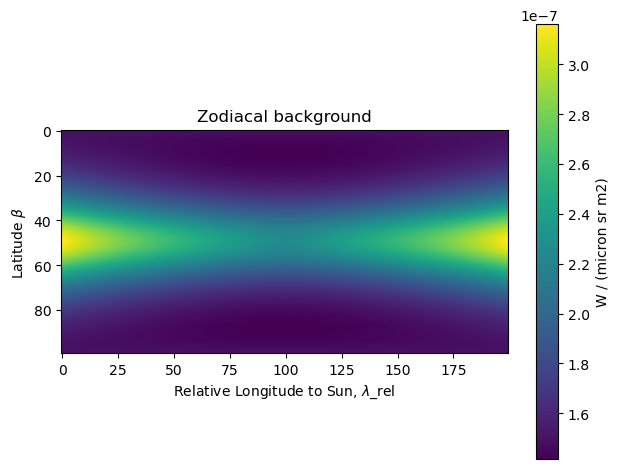

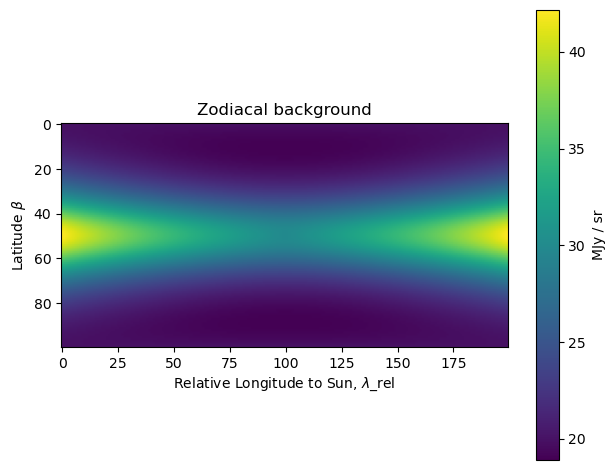

In [95]:
N_beta = 100
N_rel_lon = 200

beta_lat_grid, lambda_rel_lon_grid = np.meshgrid(
    np.linspace(-90, 90, N_beta) * np.pi/180.,
    np.linspace(90, 270, N_rel_lon) * np.pi/180.,
    indexing='ij'
)

print(beta_lat_grid.shape)
print(lambda_rel_lon_grid.shape)

wavel_this = 20. # units of um   
I_lambda_array = generate_zodiacal_spectrum(wavel=wavel_this, tau_opt=tau_opt, lambda_rel_lon_array=lambda_rel_lon_grid, beta_lat_array=beta_lat_grid)
I_nu_array = (I_lambda_array * (wavel_this*u.um)**2 / const.c).to(u.MJy / u.sr)

print(I_lambda_array.shape)

#I_lambda_array = I_lambda_array.to(u.MJy / u.um / u.sr)

plt.imshow(I_lambda_array.value)
plt.title('Zodiacal background')
plt.xlabel(r'Relative Longitude to Sun, $\lambda$_rel')
plt.ylabel(r'Latitude $\beta$')
plt.colorbar(label=str(I_lambda_array.unit))
plt.tight_layout()
plt.show()

# I_nu should be
# ~5 um: ~0.1s of MJy/sr
# ~10 um: ~10 MJy/sr
# ~20 um: ~10s to 100 MJy/sr

plt.imshow(I_nu_array.value)
plt.title('Zodiacal background')
plt.xlabel(r'Relative Longitude to Sun, $\lambda$_rel')
plt.ylabel(r'Latitude $\beta$')
plt.colorbar(label=str(I_nu_array.unit))
plt.tight_layout()
plt.show()

In [84]:
I_nu_array

<Quantity [[3.76838683e+24, 3.76838683e+24, 3.76838683e+24, ...,
            3.76838683e+24, 3.76838683e+24, 3.76838683e+24],
           [3.76954718e+24, 3.76894634e+24, 3.76834594e+24, ...,
            3.76834594e+24, 3.76894634e+24, 3.76954718e+24],
           [3.77302999e+24, 3.77182810e+24, 3.77062765e+24, ...,
            3.77062765e+24, 3.77182810e+24, 3.77302999e+24],
           ...,
           [3.77302999e+24, 3.77182810e+24, 3.77062765e+24, ...,
            3.77062765e+24, 3.77182810e+24, 3.77302999e+24],
           [3.76954718e+24, 3.76894634e+24, 3.76834594e+24, ...,
            3.76834594e+24, 3.76894634e+24, 3.76954718e+24],
           [3.76838683e+24, 3.76838683e+24, 3.76838683e+24, ...,
            3.76838683e+24, 3.76838683e+24, 3.76838683e+24]] MJy / sr>

In [37]:
# Note that I_lambda is spectral radiance per unit wavelength, units of W/m^2/micron/sr

# To get spectral radiance per unit freq, I_nu = I_lambda * wavel**2 / c, units of MJy/sr



<Quantity [3.13743167e-16, 1.87317162e-14, 5.77316186e-13, 1.06075737e-11,
           1.29094849e-10, 1.12586327e-09, 7.47167096e-09, 3.95297098e-08,
           1.72949135e-07, 6.44312628e-07, 2.09268873e-06, 6.04088927e-06,
           1.57459814e-05, 3.75518311e-05, 8.28467403e-05, 1.70664792e-04,
           3.30878767e-04, 6.07831761e-04, 1.06416334e-03, 1.78452140e-03,
           2.87882418e-03, 4.48475086e-03, 6.76919116e-03, 9.92846310e-03,
           1.41872037e-02, 1.97959354e-02, 2.70274028e-02, 3.61718490e-02,
           4.75314575e-02, 6.14142178e-02, 7.81274876e-02, 9.79715143e-02,
           1.21233162e-01, 1.48180051e-01, 1.79055289e-01, 2.14072916e-01,
           2.53414154e-01, 2.97224510e-01, 3.45611742e-01, 3.98644670e-01,
           4.56352784e-01, 5.18726593e-01, 5.85718635e-01, 6.57245047e-01,
           7.33187636e-01, 8.13396330e-01, 8.97691931e-01, 9.85869092e-01,
           1.07769943e+00, 1.17293472e+00, 1.27131007e+00, 1.37254709e+00,
           1.47635693e+00

In [8]:
#test = generate_zodiacal_spectrum(wavelength_um=wavelength_um, tau_opt=tau_opt, lambda_rel_lon=, beta_lat)
lambda_rel_lon_array = lambda_rel_lon_grid
beta_lat_array = beta_lat_grid
wavel = 5. 
#plt.imshow( np.sqrt( ( np.pi/np.arccos(np.cos(lambda_rel_lon_array) * np.cos(beta_lat_array)) ) ) )
plt.imshow( np.sqrt( ( np.pi/np.arccos(np.cos(lambda_rel_lon_array) * np.cos(beta_lat_array)) ) / ( (np.sin(beta_lat_array) ** 2.) + 0.36 * (wavel / (11. * u.um))**(-0.8) * np.cos(beta_lat_array) ** 2.) ) )
plt.colorbar()
plt.show()

NameError: name 'lambda_rel_lon_grid' is not defined

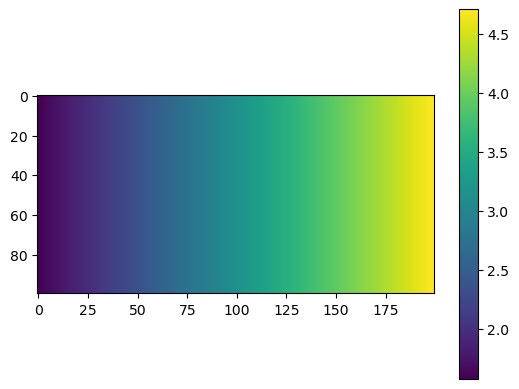

In [10]:
plt.imshow(lambda_rel_lon_grid)
plt.colorbar()
plt.show()